# Imports

In [1]:
import yfinance        as yf
import seaborn         as sns
import numpy           as np
import pandas          as pd
import statsmodels.api as sm

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_roc_curve

from matplotlib              import pyplot as plt
from pandas_datareader       import data   as pdr
from IPython.core.display    import HTML

## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [3]:
start = '2000-01-01'
end = '2019-12-31'

data = pdr.get_data_yahoo( '^GSPC', start=start, end=end )

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [5]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


# Data Description

In [6]:
df2 = data.copy()

In [7]:
df2.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Times Series Visualization

In [8]:
df3 = df2.copy()

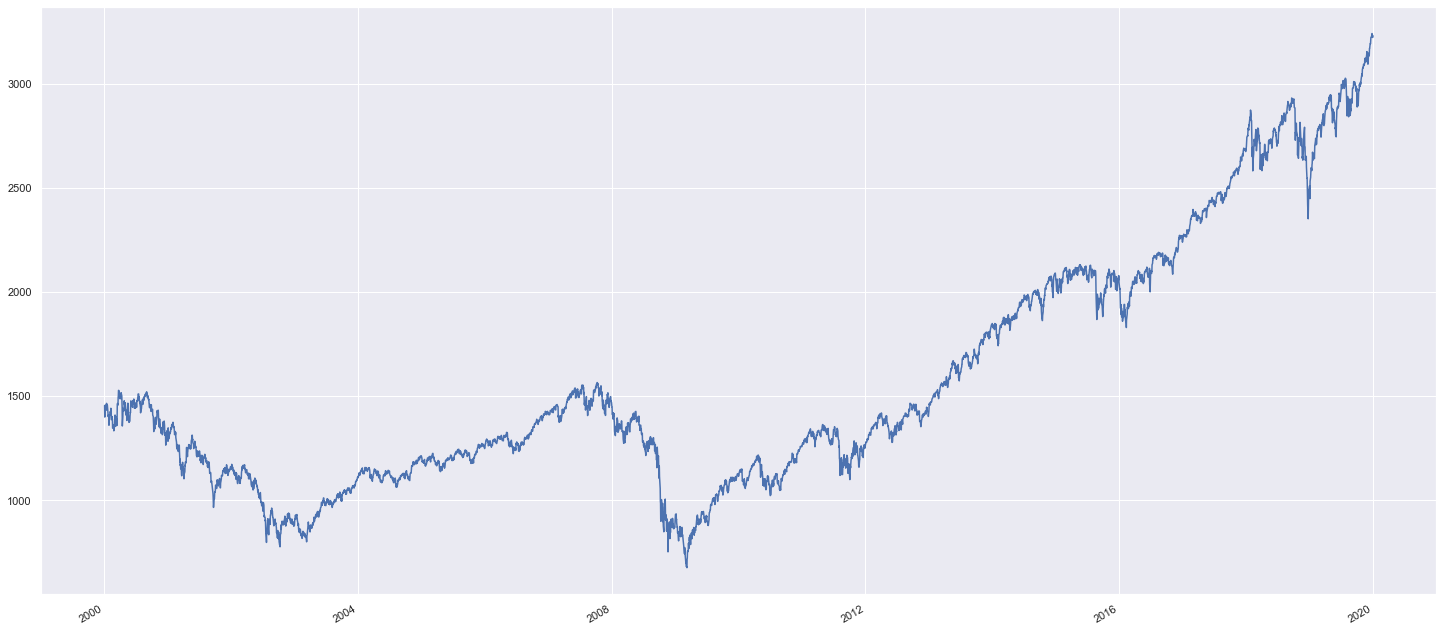

In [9]:
df3['Close'].plot()
#plt.title( 'Gráfico da Série S&P 500' );
plt.xlabel( '' );

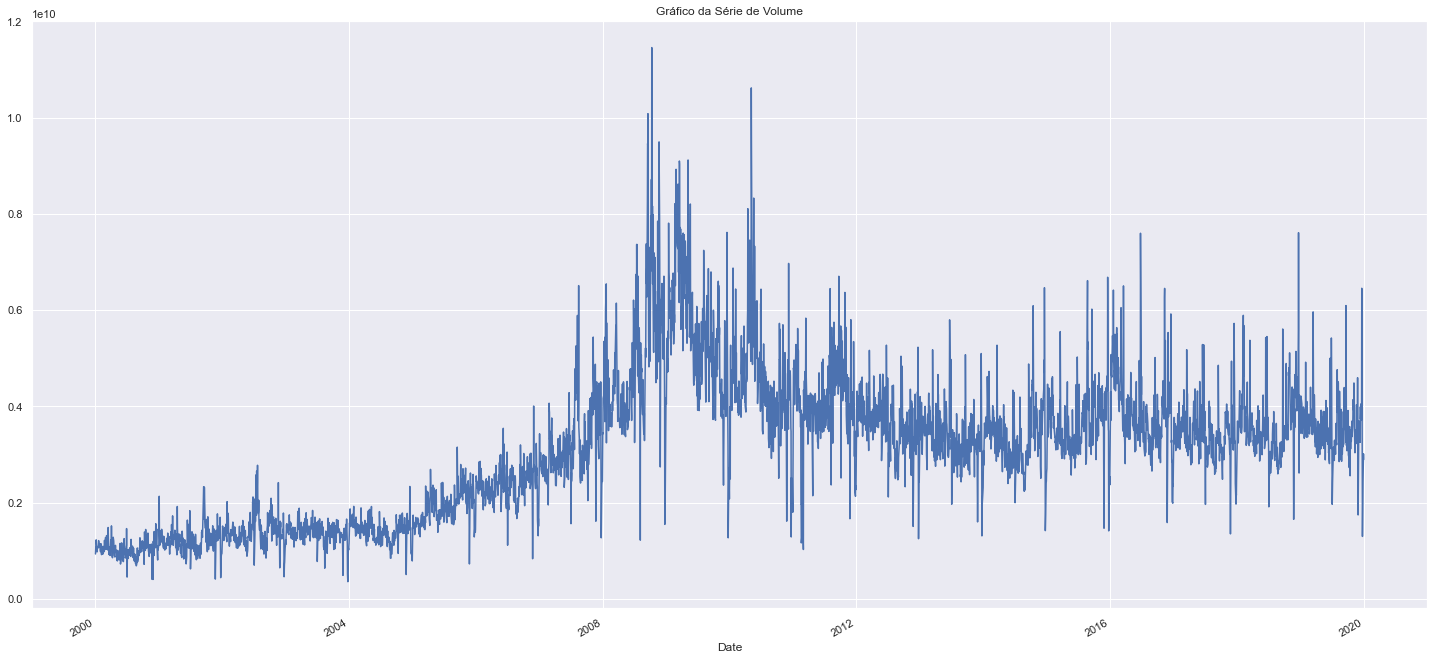

In [10]:
df3['Volume'].plot();
plt.title( 'Gráfico da Série de Volume' );

# Exploratory Data Analysis

In [11]:
df4 = df3.copy()

In [12]:
df4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,1583.705860,1565.203475,1574.823903,1575.009290,3.091681e+09,1575.009290
std,586.565207,584.963805,585.834835,585.938690,1.473928e+09,585.938690
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029
25%,1159.934998,1142.179993,1151.739990,1151.629944,1.672600e+09,1151.629944
50%,1368.920044,1349.989990,1360.829956,1361.219971,3.218700e+09,1361.219971
75%,1993.084961,1975.660034,1985.319946,1986.479980,3.918595e+09,1986.479980
max,3247.929932,3234.370117,3247.229980,3240.020020,1.145623e+10,3240.020020


In [13]:
# lag de X periodos

periodos = 1

# lag positivo de X periodos
df4['Lag_P1'] = df4['Close'].shift( periodos )

In [14]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1
Date,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951


In [15]:
# Dummy para saber se o dia atual é Alta(1) ou Baixa(0)

df4['High_Low'] = np.where( df4['Close'] > df4['Lag_P1'], 1, 0 )

In [16]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low
Date,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1


In [17]:
df4['High_Low'].mean()

0.5352812562114888

In [18]:
# Calculando o Retorno

df4['Retorno'] = df4['Close'].pct_change( periodos )

In [19]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


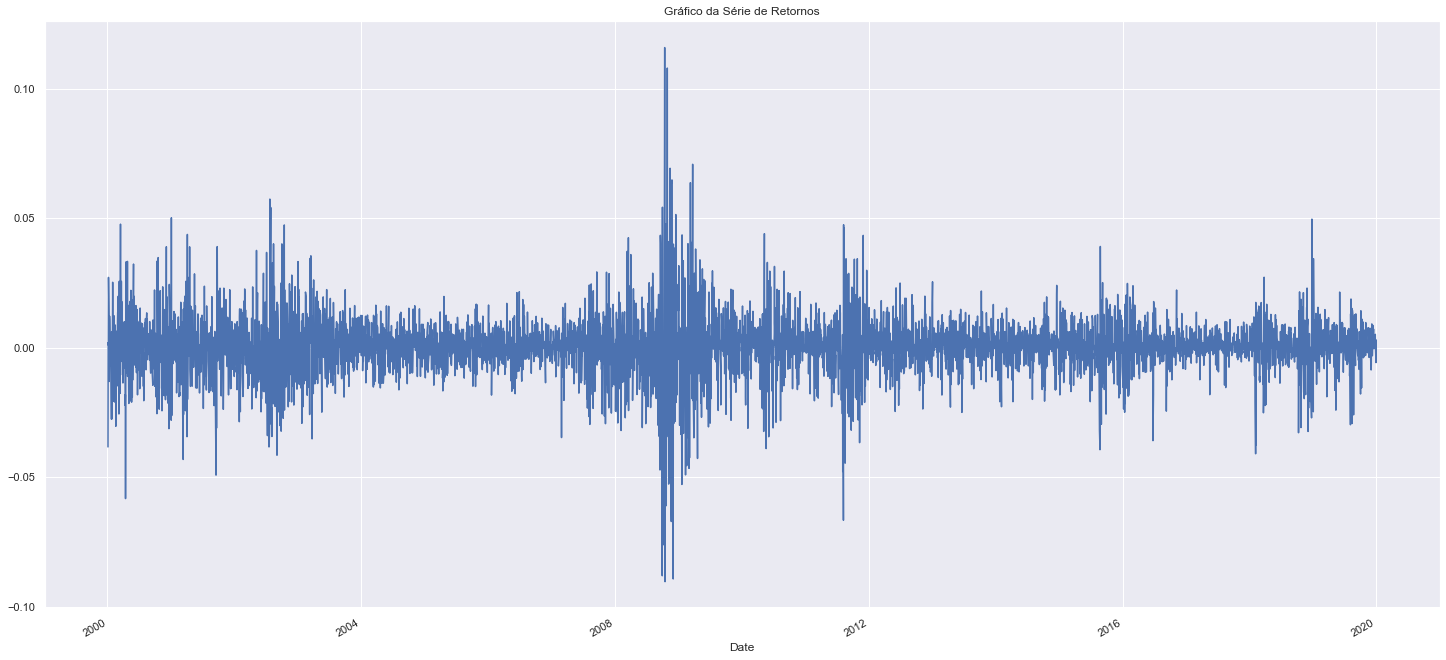

In [20]:
df4['Retorno'].plot()
plt.title( 'Gráfico da Série de Retornos' );

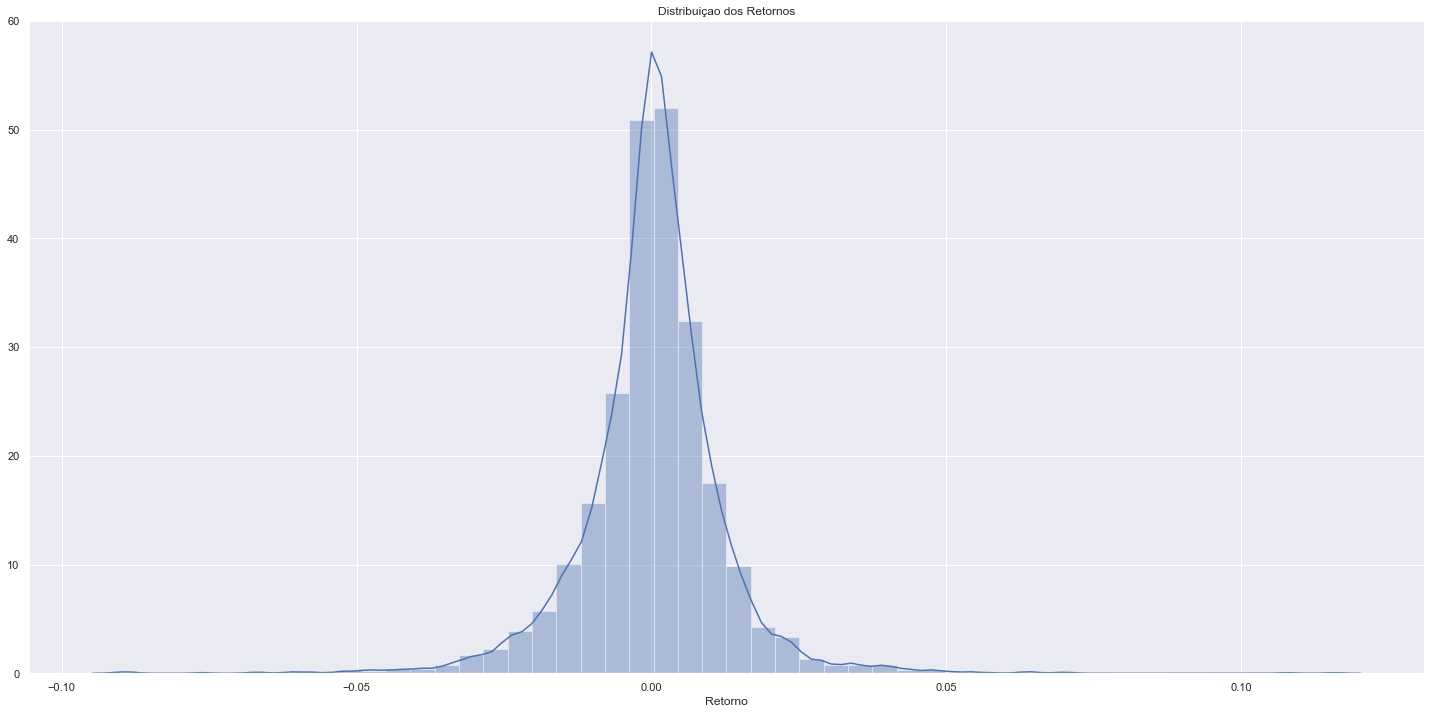

In [21]:
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.title( 'Distribuiçao dos Retornos' );

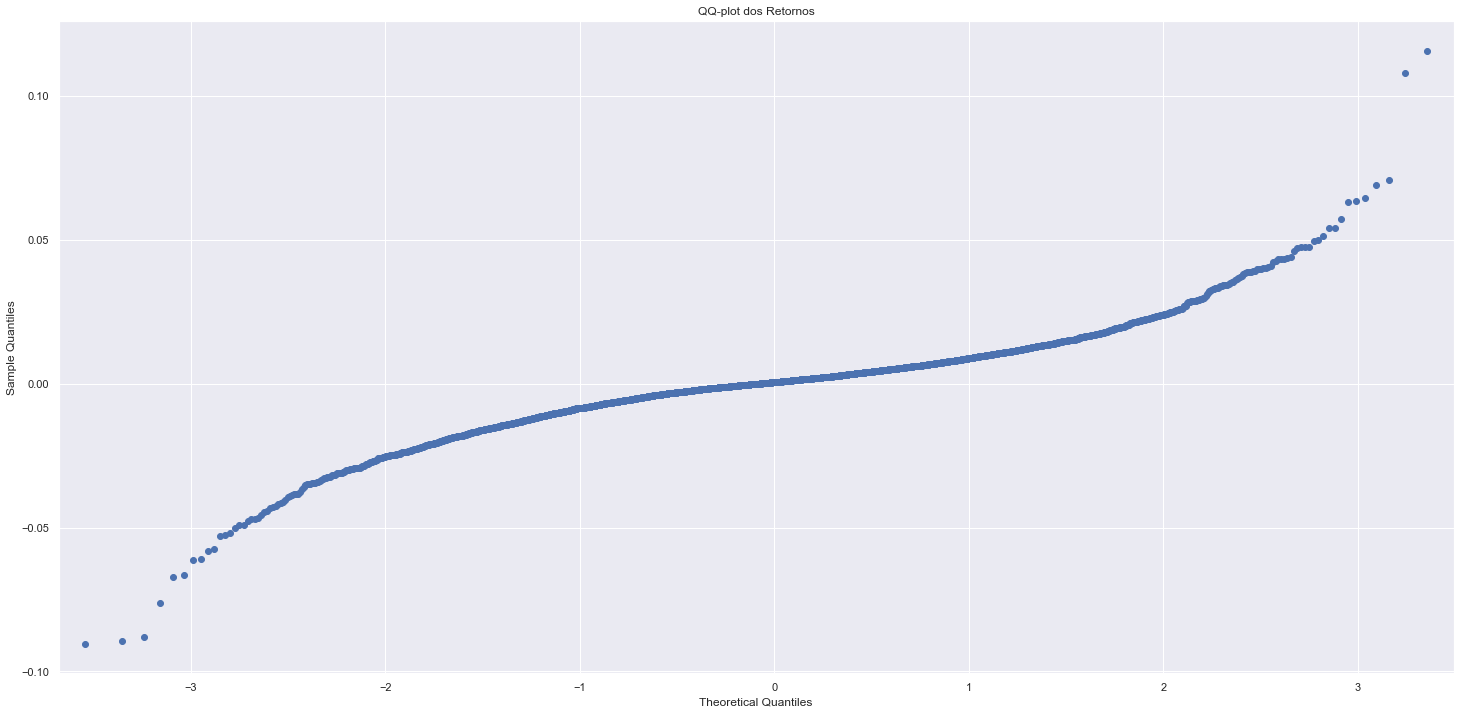

In [22]:
sm.qqplot( df4['Retorno'] )
plt.title( 'QQ-plot dos Retornos' );

Consolidando os gráficos da série histórica, série de retornos, distribuição dos retornos e qq-plot em uma mesma imagem.

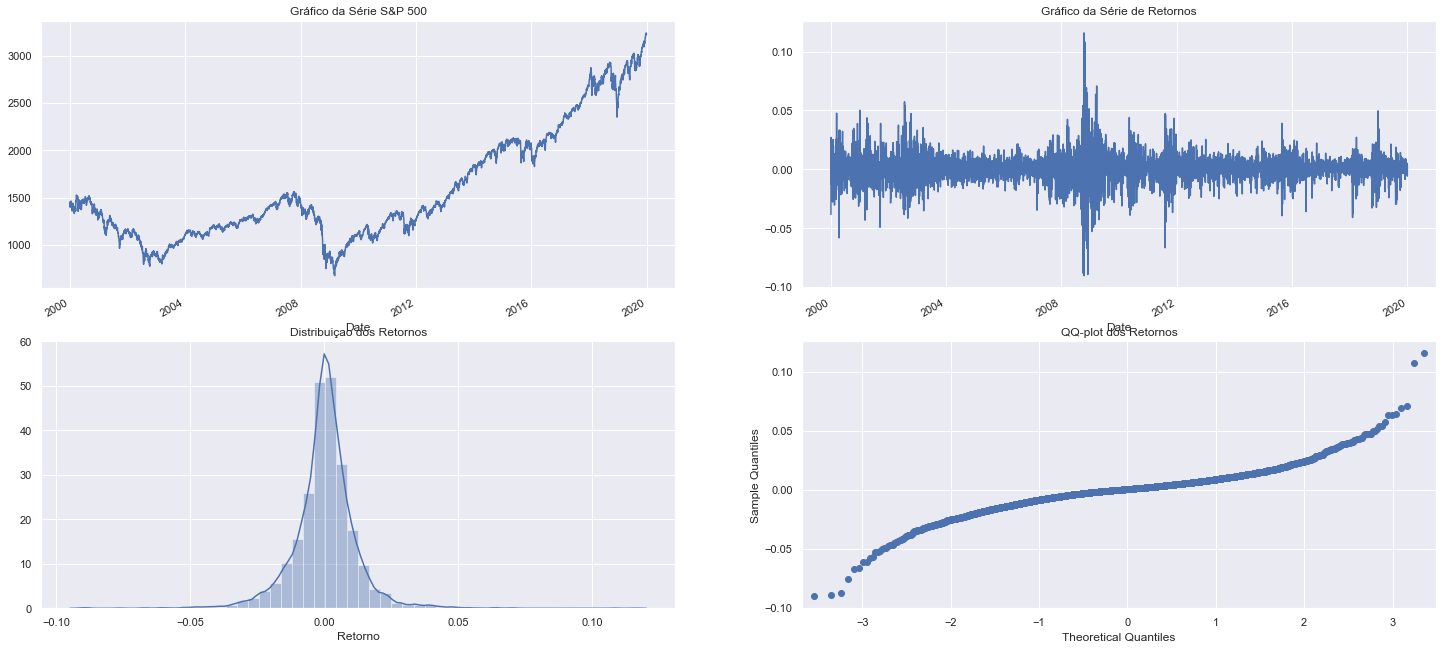

In [23]:
plt.subplot( 2, 2, 1 )
df3['Close'].plot()
plt.title( 'Gráfico da Série S&P 500' );

plt.subplot( 2, 2, 2 )
df4['Retorno'].plot()
plt.title( 'Gráfico da Série de Retornos' );

plt.subplot( 2, 2, 3 )
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.title( 'Distribuiçao dos Retornos' );

#plt.subplot( 2, 2, 4 )
sm.qqplot( df4['Retorno'], ax=plt.subplot( 2, 2, 4 ) ) 
plt.title( 'QQ-plot dos Retornos' );

In [24]:
df4['Retorno'].describe()

count    5030.000000
mean        0.000229
std         0.011889
min        -0.090350
25%        -0.004700
50%         0.000547
75%         0.005678
max         0.115800
Name: Retorno, dtype: float64

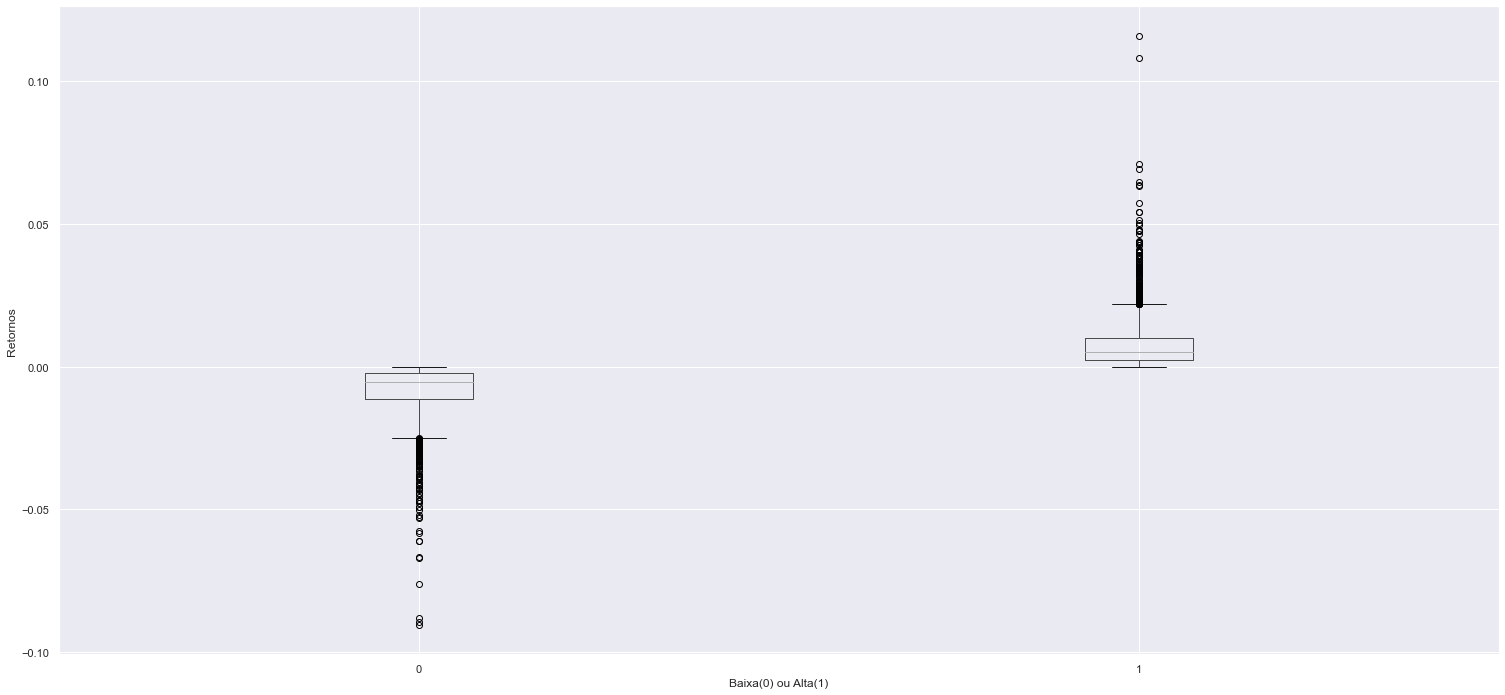

In [25]:
df4.boxplot( by='High_Low', column=['Retorno'], grid = True ) 
plt.title( '' )
plt.suptitle( '' ) # para eliminar o titulo padrao do boxplot do pandas
plt.ylabel( 'Retornos' )
plt.xlabel( 'Baixa(0) ou Alta(1)' )
plt.show();

# Feature Engineering

In [26]:
df5 = df4.copy()

In [27]:
df5.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


## Creating targets and features

In [28]:
# Adicionando um alvo

df5["Alvo1"] = df5["Retorno"].shift( -periodos )
df5["Alvo1_Bin"] = np.where( df5["Alvo1"] > 0 , 1, 0 )

In [29]:
# Construçao das Variaveis

# Desvio Padrao de 5 dias
df5["std5"] = df5["Retorno"].rolling(5).std()

# Desvio Padrao de 10 dias
df5["std10"] = df5["Retorno"].rolling(10).std()

# Desvio Padrao de 15 dias
df5["std15"] = df5["Retorno"].rolling(15).std()

# Proporçao do corpo do candle em relacao ao range do dia
df5["prop"] = (df5["Close"]-df5["Open"])/(df5["High"]-df5["Low"])

# Direçao do dia atual
df5["dir_D"] = np.where(df5['Close'] > df5['Open'] , '1', '0')

# Direçao D-1
df5["dir_D-1"] = df5["dir_D"].shift(1)

# Direçao D-2
df5["dir_D-2"] = df5["dir_D"].shift(2)

# Direçao D-3
df5["dir_D-3"] = df5["dir_D"].shift(3)

# Media Movel de 15 dias std5
df5["mm_std5"] = df5["std5"].rolling(15).mean()

# Media Movel de 15 dias std5
df5["mm_std10"] = df5["std10"].rolling(15).mean()

# Media Movel de 15 dias std5
df5["mm_std15"] = df5["std15"].rolling(15).mean()

# RSL std5
df5["RSL_std5"] = (df5["std5"]/df5["std5"].rolling(15).mean())-1

# RSL std10
df5["RSL_std10"] = (df5["std10"]/df5["std10"].rolling(15).mean())-1

# RSL std15
df5["RSL_std15"] = (df5["std15"]/df5["std15"].rolling(15).mean())-1

In [30]:
# Filtrando os valores missing

df5_filtrado = df5.dropna( axis = 0 ) 

df5_filtrado= df5_filtrado.drop( ["std5","std10","std15","mm_std5","mm_std10","mm_std15"], axis = 1 )

In [31]:
#df5_filtrado["RSL_std5"] = pd.qcut(df5_filtrado["RSL_std5"], 10, labels = False)
#df5_filtrado["RSL_std10"] = pd.qcut(df5_filtrado["RSL_std10"], 10, labels = False)
#df5_filtrado["RSL_std15"] = pd.qcut(df5_filtrado["RSL_std15"], 10, labels = False)

In [32]:
df5_filtrado.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno,Alvo1,Alvo1_Bin,prop,dir_D,dir_D-1,dir_D-2,dir_D-3,RSL_std5,RSL_std10,RSL_std15
Date,,,,,,,,,,,,,,,,,,,
2000-02-14,1394.930054,1380.530029,1387.119995,1389.939941,927300000,1389.939941,1387.119995,1,0.002033,0.008713,1,0.195829,1,0,1,0,0.087800,-0.158166,-0.013462
2000-02-15,1407.719971,1376.250000,1389.939941,1402.050049,1092100000,1402.050049,1389.939941,1,0.008713,-0.010256,0,0.384815,1,1,0,1,0.013838,-0.170691,0.003464
2000-02-16,1404.550049,1385.579956,1402.050049,1387.670044,1018800000,1387.670044,1402.050049,0,-0.010256,0.000425,1,-0.758036,0,1,1,0,-0.142614,-0.145927,0.010178
2000-02-17,1399.880005,1380.069946,1387.670044,1388.260010,1034800000,1388.260010,1387.670044,1,0.000425,-0.030376,0,0.029781,1,0,1,1,-0.166602,-0.202605,0.000828
2000-02-18,1388.589966,1345.319946,1388.260010,1346.089966,1042300000,1346.089966,1388.260010,0,-0.030376,0.004517,1,-0.974579,0,1,0,1,0.091592,-0.003503,0.028733


In [33]:
df5_filtrado.tail()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno,Alvo1,Alvo1_Bin,prop,dir_D,dir_D-1,dir_D-2,dir_D-3,RSL_std5,RSL_std10,RSL_std15
Date,,,,,,,,,,,,,,,,,,,
2019-12-23,3227.780029,3222.300049,3226.050049,3224.010010,3060610000,3224.010010,3221.219971,1,0.000866,-0.000195,0,-0.372271,0,0,1,0,-0.497055,-0.345726,-0.137421
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883,3224.010010,0,-0.000195,0.005128,1,-0.349678,0,0,0,1,-0.454918,-0.351356,-0.258307
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912,3223.379883,1,0.005128,0.000034,1,0.986788,1,0,0,0,-0.437962,-0.316370,-0.260587
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020,3239.909912,1,0.000034,-0.005781,0,-0.531715,0,1,0,0,-0.371671,-0.398238,-0.239121
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039,3240.020020,0,-0.005781,0.002946,1,-0.772081,0,0,1,0,-0.021015,-0.173216,-0.200461


# Machine Learning Modelling

In [34]:
df6 = df5_filtrado.copy()

## Split into training and test dataset

In [35]:
# Separando os dados entre treinamento e teste

# Vamos treinar o modelo de 2000 à 2017
start_train = "2000-01-01" #"2000-02-14"
end_train = "2017-12-31"

# Vamos testar o modelo de 2018 à 2019
start_test = "2018-01-01"
end_test = "2019-12-31"

df6_train1 = df6[start_train : end_train]

df6_test1 = df6[start_test : end_test]

In [36]:
df6.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'Lag_P1',
       'High_Low', 'Retorno', 'Alvo1', 'Alvo1_Bin', 'prop', 'dir_D', 'dir_D-1',
       'dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10', 'RSL_std15'],
      dtype='object')

In [37]:
# Separando os dados com as variaveis em x e o alvo em y
 
x_train1 = df6_train1.iloc[:, 11:19] # 'prop', 'dir_D', 'dir_D-1','dir_D-2', 'dir_D-3', 'RSL_std5', 'RSL_std10', 'RSL_std15'
y_train1 = df6_train1['Alvo1_Bin']

x_test1 = df6_test1.iloc[:, 11:19]
y_test1 = df6_test1['Alvo1_Bin']

In [38]:
sum(y_train1)/len(y_train1)

0.5330073349633252

In [39]:
sum(y_test1)/len(y_test1)

0.5597609561752988

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression( random_state=42 ).fit( x_train1, y_train1)
lr_pred = lr_model.predict( x_test1 )

In [41]:
# Teste

print(confusion_matrix( y_test1, lr_pred ) )
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report( y_test1, lr_pred ) )

[[ 50 171]
 [ 88 193]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.36      0.23      0.28       221
           1       0.53      0.69      0.60       281

    accuracy                           0.48       502
   macro avg       0.45      0.46      0.44       502
weighted avg       0.46      0.48      0.46       502



In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve( y_test1, lr_pred )
auc( fpr, tpr )

0.4565385420524629

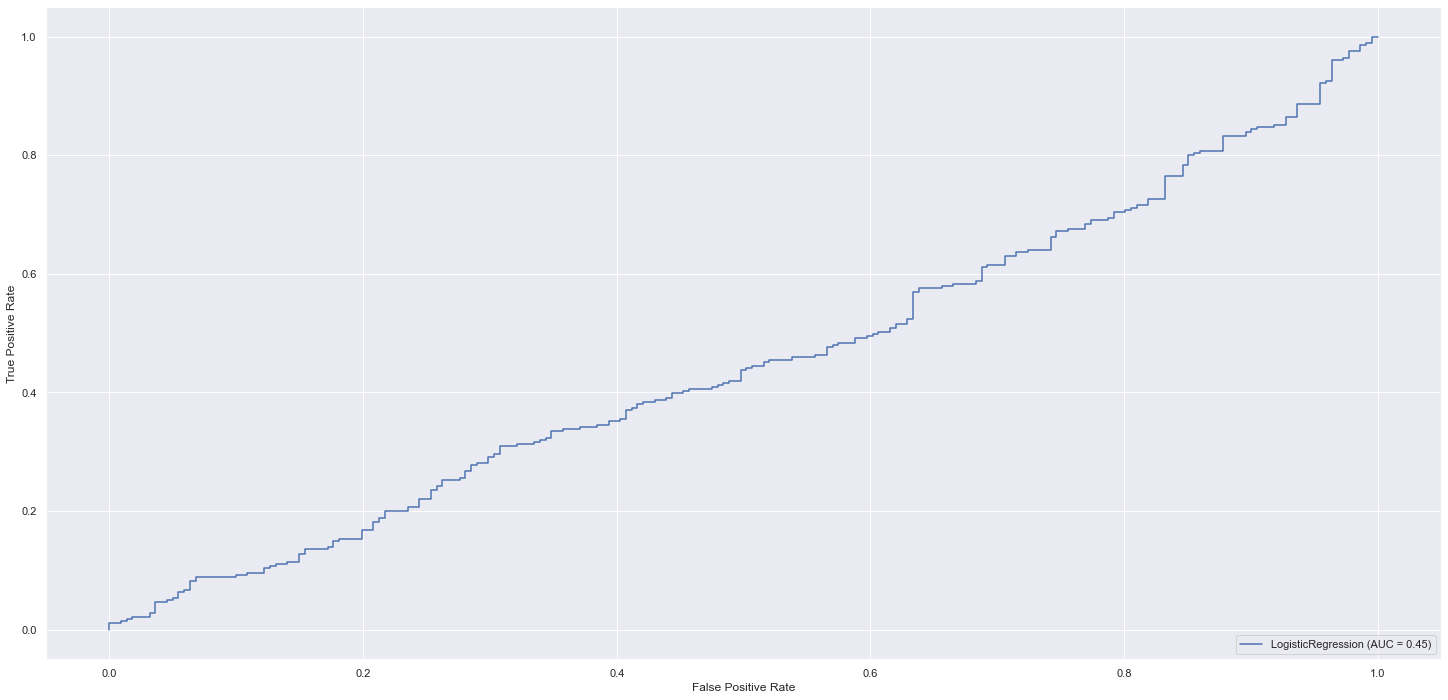

In [43]:
plot_roc_curve(lr_model, x_test1, y_test1)

# Neural Networks

## Feature Scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler( feature_range = (0, 1) )
x_train1 = sc.fit_transform( x_train1 )

## Reshaping

In [45]:
#x_train1.head()

In [46]:
x_train1 = np.asarray( x_train1 ).astype( np.float32 )
x_train1 = np.reshape( x_train1, ( x_train1.shape[0], x_train1.shape[1], 1 ) )

## Initialising the RNN

In [47]:
clf = Sequential()

## Adding the first layer and dropout regularisation

In [54]:
x_train1.shape[1]

8

In [48]:
clf.add( LSTM( units = 100, return_sequences = True, input_shape = ( x_train1.shape[1], 1 ) ) )
clf.add( Dropout( 0.2 ) )

## Adding a second layer and dropout regularisation

In [49]:
clf.add( LSTM( units = 100, return_sequences = True, activation='relu' ) )
clf.add( Dropout( 0.2 ) )

## Adding a third layer and dropout regularisation

In [50]:
clf.add( LSTM( units = 100, return_sequences = True, activation='relu' ) )
clf.add( Dropout( 0.2 ) )

## Adding a fourth layer and dropout regularisation

In [51]:
clf.add( LSTM( units = 100, activation='relu' ) )
clf.add( Dropout( 0.2 ) )

## Adding the output layer and dropout regularisation

In [52]:
clf.add( Dense( units = 1, activation='sigmoid' ) )

In [53]:
clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 100)            40800     
_________________________________________________________________
dropout (Dropout)            (None, 8, 100)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 8, 100)            80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 100)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               8

## Compiling the RNN

In [304]:
clf.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'] )

## Fitting the RNN

In [305]:
clf.fit( x_train1, y_train1, epochs = 100, batch_size = 50 )

Epoch 1/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6919 - accuracy: 0.5312
Epoch 2/100
90/90 [==============================] - 2s 20ms/step - loss: 0.6905 - accuracy: 0.5330
Epoch 3/100
90/90 [==============================] - 2s 20ms/step - loss: 0.6900 - accuracy: 0.5326
Epoch 4/100
90/90 [==============================] - 2s 24ms/step - loss: 0.6896 - accuracy: 0.5341
Epoch 5/100
90/90 [==============================] - 3s 28ms/step - loss: 0.6894 - accuracy: 0.5323
Epoch 6/100
90/90 [==============================] - 2s 20ms/step - loss: 0.6896 - accuracy: 0.5352
Epoch 7/100
90/90 [==============================] - 2s 23ms/step - loss: 0.6898 - accuracy: 0.5323
Epoch 8/100
90/90 [==============================] - 2s 25ms/step - loss: 0.6901 - accuracy: 0.5323
Epoch 9/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6898 - accuracy: 0.5332
Epoch 10/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6891 - accuracy: 0.5315

90/90 [==============================] - 2s 26ms/step - loss: 0.6878 - accuracy: 0.5341
Epoch 82/100
90/90 [==============================] - 3s 28ms/step - loss: 0.6881 - accuracy: 0.5252
Epoch 83/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6879 - accuracy: 0.5348
Epoch 84/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6881 - accuracy: 0.5301
Epoch 85/100
90/90 [==============================] - 2s 25ms/step - loss: 0.6880 - accuracy: 0.5272
Epoch 86/100
90/90 [==============================] - 2s 25ms/step - loss: 0.6884 - accuracy: 0.5277
Epoch 87/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6880 - accuracy: 0.5357
Epoch 88/100
90/90 [==============================] - 2s 26ms/step - loss: 0.6882 - accuracy: 0.5221
Epoch 89/100
90/90 [==============================] - 3s 29ms/step - loss: 0.6880 - accuracy: 0.5350
Epoch 90/100
90/90 [==============================] - 2s 27ms/step - loss: 0.6874 - accuracy: 0.5317
Epo

### Getting the predicted S&P 500

In [306]:
#x_test1 = np.asarray( x_test1 ).astype( np.float32 )
x_test1 = sc.transform( x_test1 )
x_test1 = np.reshape( x_test1, ( x_test1.shape[0], x_test1.shape[1], 1 ) )

In [307]:
y_pred1 = clf.predict( x_test1 )
y_pred1 =( y_pred1 > 0.5 )

In [316]:
#y_pred1

### Visualising the results

In [309]:
clf.evaluate( x_train1, y_train1 ) # Loss and accuracy of the model

141/141 [==============================] - 1s 8ms/step - loss: 0.6874 - accuracy: 0.5379


[0.6874433159828186, 0.5378972887992859]

In [310]:
# Confusion Matrix and Classification Metrics

print(confusion_matrix( y_test1, y_pred1 ) )
print()
print("--------------------------------------------------------------------------------")
print()
print(classification_report( y_test1, y_pred1 ) )

[[ 17 204]
 [ 21 260]]

--------------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.45      0.08      0.13       221
           1       0.56      0.93      0.70       281

    accuracy                           0.55       502
   macro avg       0.50      0.50      0.41       502
weighted avg       0.51      0.55      0.45       502



In [311]:
# Area Under Curve

fpr, tpr, thresholds = roc_curve( y_test1, y_pred1 )
auc( fpr, tpr )

0.5010949904188338

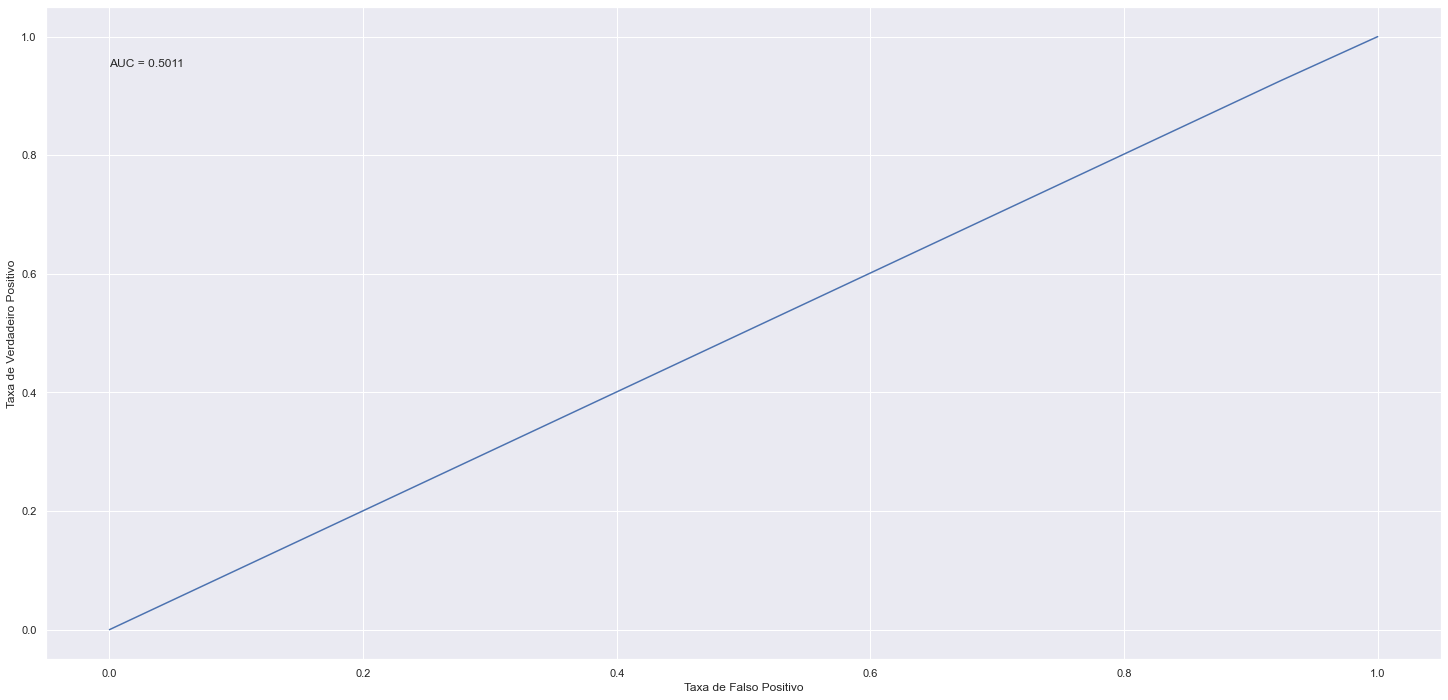

In [315]:
plt.plot(fpr, tpr)
plt.text(0.0, 0.95, "AUC = " + str(round(auc( fpr, tpr ),4)))
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show();